# AWM Level2

We start by importing standard packages.
Notice that *networkx* is used here just for visualization, but AWM does not use it.

In [1]:
import numpy as np
import gym
import networkx as nx

Next, we import our OpenAI gym game.

In [2]:
import agentwebmodel

### Defining a server

We set up a proper *adjacency matrix* for the open connections among the files on our webserver.

In [3]:
A = np.zeros((11,11))
A[0,1] = 1; A[0,4] = 1; A[0,5] = 1
A[1,2] = 1; A[1,3] = 1
A[2,0] = 1
A[4,0] = 1; A[4,1] = 1
A[5,6] = 1
A[6,0] = 1
A[7,8] = 1; A[7,9] = 1

We define a second *adjacency matrix* for the implicit connections among the files on our webserver.

In [4]:
B = np.zeros((11,11))
B[0,7] = 1
B[2,10] = 1

We use *networkx* to show the structure of the files on the webserver, using arbitrary labels. We first show the open links, and then we show the implicit links.

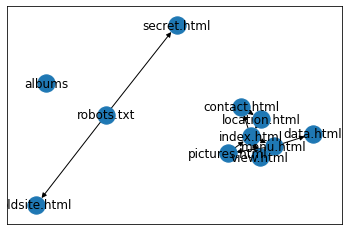

In [5]:
G1 = nx.from_numpy_matrix(A,create_using=nx.DiGraph)
labels = {0:'index.html',1:'menu.html',2:'pictures.html',3:'data.html',4:'view.html',5:'contact.html',6:'location.html',7:'robots.txt',8:'secret.html',9:'oldsite.html',10:'albums'}
nx.draw_networkx(G1,labels=labels)

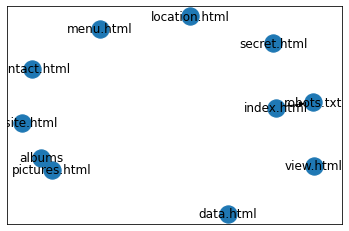

In [6]:
G2 = nx.from_numpy_matrix(B,create_using=nx.DiGraph)
labels = {0:'index.html',1:'menu.html',2:'pictures.html',3:'data.html',4:'view.html',5:'contact.html',6:'location.html',7:'robots.txt',8:'secret.html',9:'oldsite.html',10:'albums'}
nx.draw_networkx(G2,labels=labels)

We instantiate a game with the structure above and a flag in file *oldsite.html*.

In [7]:
env = gym.make('awm_level2-v0',A=A,B=B,flag=9)

We reset the environment, and get the first observation corresponding to the only file known to the attacker at the beginning (*index.html*).

In [8]:
observation = env.reset()
print(observation)

[0]


We send an empty command.

In [9]:
env.step({'command': env.CMD_NONE, 'targetfile': 0})

(None, -1, False, {'msg': 'None'})

We receive an empty answer. Notice that the return values of *step()* are: (i) an observation, (ii) a reward, (iii) whether the game has ended, (iv) auxiliary messages.

We check *index.html* (file 0) for a flag.

In [10]:
env.step({'command': env.CMD_SEARCH, 'targetfile': 0})

(False, -1, False, {'msg': 'No flag in file 0'})

No flag here.

We then look for links form *index.html* (file 0)

In [11]:
env.step({'command': env.CMD_READ, 'targetfile': 0})

(array([1, 4, 5]), -1, False, {'msg': 'Files openly connected to file 0'})

We discover links to *menu.html* (file 1), *view.html* (file 4), and *contact.html* (file 5).

We look for more links from *contact.html*.

In [12]:
env.step({'command': env.CMD_READ, 'targetfile': 4})

(array([0, 1]), -1, False, {'msg': 'Files openly connected to file 4'})

We discover links back to *index.html* (file 0) and to *menu.html* (file 1)

We look for a flag in *contact.html* (file 5).

In [13]:
env.step({'command': env.CMD_SEARCH, 'targetfile': 5})

(False, -1, False, {'msg': 'No flag in file 5'})

No flag here. We try to look for implicit links in *view.html* (file 4)

In [14]:
env.step({'command': env.CMD_DEEPREAD, 'targetfile': 4})

(array([], dtype=int64),
 -1,
 False,
 {'msg': 'Files implicitly connected to file 4'})

No hidden links here. We try looking for implicit links in *index.html* (file 0)

In [15]:
env.step({'command': env.CMD_DEEPREAD, 'targetfile': 0})

(array([7]), -1, False, {'msg': 'Files implicitly connected to file 0'})

We discovered a hidden file, *robots.txt* (file 7), which we now explore.

In [16]:
env.step({'command': env.CMD_READ, 'targetfile': 7})

(array([8, 9]), -1, False, {'msg': 'Files openly connected to file 7'})

This leads to two other files, *secret.html* (file 8) and *oldsite.html* (file 9), which we now check for the flag.

In [17]:
env.step({'command': env.CMD_SEARCH, 'targetfile': 8})

(False, -1, False, {'msg': 'No flag in file 8'})

In [18]:
env.step({'command': env.CMD_SEARCH, 'targetfile': 9})

(True, 100, True, {'msg': 'Flag found in file 9'})

At the second attempt we got the flag!